In [1]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.spatial import procrustes

unable to import 'smart_open.gcs', disabling that module


In [2]:
df = pd.read_csv('../project/geocoded/all_276k.csv')

/gpfs/ysm/project/amth/amth_av622/conda_envs/notebook_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (3,9,11,14,16,17,19,22,23,43,44,45,47,49,52,64,73,74,76,79,82,91,92,105,108) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [4]:
keep = ['month', 'stemmer', 'County', 'State', 'SDI']

In [5]:
df['stemmer'] = pd.Series([eval(i) for i in df['stemmer']])

In [6]:
hotspots = pd.read_csv('../project/population-adjusted-county-hotspots.csv', header=None)
hotspots.columns = ['County', 'State']
hotspots['State'] = pd.Series([states[x] for x in hotspots['State']])
hotspots['County'] = pd.Series([x + ' County' for x in hotspots['County']])
hotspots['County_State'] = pd.Series(hotspots['County'] + ' ' + hotspots['State'])
df['County_State'] = pd.Series(df['County'] + ' ' + df['State'])

In [7]:
hotspots_df = df[keep][~pd.isnull(df['stemmer']) & df['County_State'].isin(hotspots['County_State'])]

In [8]:
df = df[keep][~np.isnan(df["SDI"]) & ~pd.isnull(df['stemmer'])]
df

,month,stemmer,County,State,SDI
0,January,"[lysol, da, fuck, outta, everyth, bc, aint, ca...",Tarrant County,Texas,57.0
1,January,"[coronaviru, confirm, washington]",Allegan County,Michigan,11.0
2,January,"[hmmmmm, could, coronaviru, soon, new, plagu]",Leon County,Florida,70.0
3,January,"[million, peopl, wuhan, larger, new, york, cit...",Maricopa County,Arizona,65.0
5,January,"[china, quarantin, wuhan, chines, govern, quar...",Richmond County,North Carolina,88.0
...,...,...,...,...,...
276411,March,"[realdonaldtrump, realdonaldtrump, stop, count...",Piscataquis County,Maine,52.0
276412,March,"[durham, im, bet, thursday, well, also, shelte...",Wake County,North Carolina,23.0
276413,March,"[mitchellreport, msnbc, medic, scienc, found, ...",New Castle County,Delaware,30.0
276414,March,"[dude, fuck, crib, coronaviru, said, sex, fuck...",Oakland County,Michigan,12.0


In [57]:
for i,x in enumerate(df['stemmer']):
    print (x)
    if (x == ['wuhan', 'cut', 'inflow', 'outflow', 'transport', 'announc', 'local', 'time', 'coronaviru']):
        print (df.iloc[i])
        break

['lysol', 'da', 'fuck', 'outta', 'everyth', 'bc', 'aint', 'catch', 'coronaviru']
['coronaviru', 'confirm', 'washington']
['hmmmmm', 'could', 'coronaviru', 'soon', 'new', 'plagu']
['million', 'peopl', 'wuhan', 'larger', 'new', 'york', 'citi', 'million']
['china', 'quarantin', 'wuhan', 'chines', 'govern', 'quarantin', 'citi', 'wuhan', 'plan', 'shut', 'airport', 'public', 'transport']
['littl', 'evid', 'coronaviru', 'epidem', 'control', 'say', 'virolog', 'expert']
['got', 'coronaviru', 'yo']
['receiv', 'brief', 'today', 'case', 'ask', 'health', 'offic', 'coronaviru', 'compar', 'flu', 'thought', 'less', 'contagi', 'flu']
['new', 'coronaviru', 'wuhan', 'chinaand', 'upcom', 'travel', 'lunar', 'new', 'yearsi', 'think', 'may', 'pretti', 'bad', 'time', 'go', 'affect', 'everyon', 'global', 'pleas', 'take', 'care']
['insert', 'coronaviru', 'joke']
['question', 'left', 'long', 'zombi', 'appear', 'china', 'quarantin', 'wuhan', 'shut', 'airport', 'public', 'transit', 'amid', 'coronaviru', 'outbreak'

['break', 'best', 'global', 'holist', 'articl', 'wuhan', 'coronoviru', 'date', 'publish', 'sun', 'redblack', 'dot', 'wuhan', 'region', 'red', 'dot', 'worst', 'shanghai', 'mile', 'hong', 'kong', 'protest', 'hk', 'tag']
['bless', 'coronaviru', 'patient', 'wish', 'everyon', 'healthi', 'new', 'year', 'also', 'lunar', 'new', 'year', 'holiday', 'extend', 'feb', 'due', 'coronaviru', 'threat', 'china', 'sorri', 'inconveni', 'caus']
['hope', 'coronaviru', 'hit', 'everyon', 'racist', 'asian', 'rn', 'yall', 'aint', 'shit']
['add', 'signatur', 'asu', 'asu', 'arizona', 'coronoaviru']
['student', 'close', 'entir', 'uci', 'campu', 'irvin', 'stop', 'wuhan', 'coronaviru', 'sign', 'petit', 'via', 'chang']
['icymi', 'deplet', 'cdc', 'nih', 'scientif', 'spend', 'outsid', 'militari', 'tech', 'trump', 'administr', 'econom', 'analyst', 'say', 'may', 'take', 'year', 'proper', 'amp', 'full', 'respons', 'coronaviru', 'reach', 'epidem', 'level', 'usa']
['flip', 'side', 'thousand', 'case', 'diseas', 'still', 'hos

['jonrappoport', 'rsbellmedia', 'richieallenshow', 'harvard', 'espionag', 'indict', 'follow', 'discoveri', 'chines', 'nation', 'steal', 'virul', 'virus', 'canada', 'biosafeti', 'level', 'lab', 'ship', 'wuhan', 'lab']
['news', 'born', 'date', 'expir', 'date', 'toss', 'away', 'dont', 'use', 'outsid', 'rang', 'stale', 'spoil', 'rotten', 'coronaviru']
['global', 'economi', 'local', 'economi', 'affect', 'coronaviru', 'say', 'lewisucobdean', 'coronavirusoutbreak', 'discuss']
['newsmed', 'thelancet', 'studi', 'team', 'describ', 'new', 'coronaviru', 'outbreak', 'mysteri', 'pneumonialik', 'ill', 'start', 'wuhan', 'citi', 'china', 'dont', 'love', 'mysteri']
['coronaviru', 'stop', 'worri', 'polit', 'peopl', 'die', 'talk', 'viru', 'stay', 'wake']
['thank', 'god', 'sick', 'woman', 'italian', 'cruis', 'ship', 'parent', 'board', 'coronaviru']
['thank', 'good', 'wisdom', 'amp', 'commonsens', 'prevail', 'symphonyhal', 'belov', 'bostonsymphoni', 'made', 'wise', 'decis', 'bravissimo', 'markvolp', 'amp', 

['yall', 'gonna', 'sit', 'tell', 'didnt', 'find', 'cure', 'coronaviru', 'limitthepopul']
['truth', 'coronaviru', 'stop', 'freak', 'alertbutnotanxi']
['hypocrisi', 'there', 'tweet', 'everyth', 'trumpisanidiot', 'trump', 'post', 'golf', 'photo', 'amid', 'coronaviru', 'crisi', 'despit', 'condemn', 'obama', 'golf', 'amid', 'ebola', 'outbreak']
['durham', 'startup', 'hurt', 'coronaviru', 'thousand', 'peopl', 'across', 'world', 'eagerli', 'wait', 'mosi', 'tea', 'infus', 'theyll', 'wait', 'littl', 'longer', 'product', 'made', 'china', 'factori', 'close', 'stori', 'wral']
['appar', 'magnific', 'creatur', 'caus', 'coronaviru', 'wuhan', 'food', 'market']
['eggxactli', 'say', 'airport', 'screen', 'dont', 'shit', 'fam', 'viru', 'n', 'pass', 'without', 'symptom', 'im', 'wrong', 'line', 'work', 'us', 'least', 'confirm', 'case', 'coronaviru', 'kill', 'peopl', 'china']
['got', 'coronaviru', 'guy', 'give', 'excus', 'mountain', 'mountain', 'cocain', 'cure', 'whosdown']
['us', 'oil', 'skid', 'bear', 'mar

['finna', 'tell', 'boss', 'got', 'coronaviru', 'cuz', 'aint', 'missin', 'bro', 'bday']
['cdcdirector', 'cdcgov', 'cdcdirector', 'question', 'isnt', 'death', 'rate', 'calcul', 'mani', 'peopl', 'recov', 'vs', 'mani', 'peopl', 'die', 'viru', 'seem', 'like', 'much', 'accur', 'way', 'calcul', 'death', 'rate', 'coronaviru']
['much', 'actual', 'worri', 'new', 'coronaviru', 'self']
['talk', 'coronaviru', 'win', 'morn']
['scientist', 'race', 'model', 'next', 'move', 'coronaviru', 'that', 'still', 'hard', 'predict']
['would', 'like', 'poor', 'shmuck', 'got', 'coronaviru', 'first', 'start', 'spread']
['michigan', 'monitor', 'new', 'possibl', 'case', 'coronaviru', 'oakland', 'counti']
['coronaviru', 'updat', 'intel', 'sourc', 'iwa', 'told', 'tell', 'cpac', 'organ', 'ask', 'ppl', 'theyd', 'travel', 'oversea', 'last', 'daysif', 'im', 'sure', 'yall', 'know', 'ianbwalt', 'mschlapp', 'acuconserv', 'odd', 'media', 'affect', 'infect']
['jaidelucil', 'ur', 'mama', 'build', 'immun', 'coronaviru', 'herb', '

['imagin', 'go', 'cruis', 'get', 'strand', 'due', 'coronaviru']
['realli']
['coronaviru', 'revis', 'diagnosi', 'method', 'china', 'see', 'case', 'number', 'soar']
['honestli', 'probabl', 'safer', 'space', 'there', 'coronaviru']
['coronaviru', 'china', 'f', 'put', 'thai', 'gp', 'risk', 'dorna', 'wait', 'ok', 'author', 'kick', 'gp', 'carmelo', 'ezpeleta', 'optimist', 'start', 'world', 'championship', 'qatar', 'confirm']
['hope', 'coronaviru', 'doesnt', 'find', 'way', 'ex', 'p', 'sherman', 'wallabi', 'way', 'sydney']
['social', 'medicin', 'north', 'korea', 'shoot', 'dead', 'coronaviru', 'patient', 'he', 'seen', 'public', 'bath']
['break', 'updat', 'resist', 'reclaimidaho', 'indivisibleid', 'postcardstovot', 'iddem', 'idpol', 'demcastid', 'swidahonow']
['new', 'song', 'stream', 'soundcloud', 'bluefac', 'mikesherm', 'soundcloud', 'coronaviru', 'heat', 'tiktok', 'triller', 'liluzi', 'rap', 'hiphop', 'beat']
['fredwalton', 'certainli', 'make', 'case', 'cruiseship', 'holiday', 'travel', 'cabin

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
low_sdi = df[df['SDI'] <= 20]
high_sdi = df[df['SDI'] >= 90]

In [10]:
set_top_monograms = ['coronaviru', 'china', 'job', 'stock', 'trump', 'wuhan', 'covid']

### January

In [11]:
jan_model = gensim.models.Word2Vec(list(df[df['month'] == 'January']['stemmer']))
january_closest = pd.DataFrame()

In [12]:
#for word in top_monograms['January']:
for word in set_top_monograms:
    try:
        january_closest[word] = [x[0] for x in jan_model.wv.most_similar(word, topn=30)]
    except:
        continue
january_closest

,coronaviru,china,job,stock,trump,wuhan
0,th,rise,white,right,realdonaldtrump,new
1,woman,countri,wait,done,anim,news
2,two,spread,ask,big,great,travel
3,pm,recov,hear,panic,ask,patient
4,across,toll,mean,watch,kid,break
5,husband,updat,whole,ye,littl,novel
6,diagnos,suspect,well,reason,alway,cnn
7,citizen,humantohuman,kid,hard,plagu,youtub
8,person,within,help,wish,ebola,commun
9,number,wuhan,long,pray,made,dozen


### February

In [13]:
feb_model = gensim.models.Word2Vec(list(df[df['month'] == 'February']['stemmer']))
february_closest = pd.DataFrame()

In [14]:
#for word in top_monograms['February']:
for word in set_top_monograms:
    try:
        february_closest[word] = [x[0] for x in feb_model.wv.most_similar(word, topn=30)]
    except:
        continue
february_closest

,coronaviru,china,job,stock,trump,wuhan,covid
0,viru,outsid,mr,point,presid,infect,sarscov
1,trumpli,itali,republican,drop,realdonaldtrump,california,sciencealert
2,scum,mainland,donaldjtrumpjr,crash,democrat,hospit,ncov
3,hardi,provinc,dem,dow,administr,outsid,coronavirusoutbreak
4,reinfect,worldwid,idiot,market,donald,korea,novel
5,soleimani,hyundai,speakerpelosi,fall,potu,unknown,ncv
6,fibromyalgia,jump,senschum,plung,handl,recov,coronavirusiran
7,benshapiro,recent,great,tank,vp,diagnos,coronavirusupd
8,icu,risen,impeach,turmoil,mike,estim,broitsjusttheflu
9,sensit,hubei,evangel,jone,blame,monitor,ddoomwho


### March

In [15]:
mar_model = gensim.models.Word2Vec(list(df[df['month'] == 'March']['stemmer']))
march_closest = pd.DataFrame()

In [16]:
#for word in top_monograms['March']:
for word in set_top_monograms:
    try:
        march_closest[word] = [x[0] for x in mar_model.wv.most_similar(word, topn=30)]
    except:
        continue
march_closest

,coronaviru,china,job,stock,trump,wuhan,covid
0,viru,wuhan,incom,sold,obama,origin,coronavirusupd
1,coronaviruscovid,russia,laid,crash,presid,china,coronaviruspandem
2,covidcoronaviru,iran,work,portfolio,realdonaldtrump,ccp,coronavirusoutbreak
3,actual,ccp,wage,tank,lie,chines,coronavirusseattl
4,itll,chines,unemploy,market,incompet,provinc,covidu
5,alreadi,foreign,compani,volatil,donald,hubei,staysafestayhom
6,everyday,communist,employ,dump,politician,communist,stopthespread
7,might,origin,busi,plung,impeach,sar,coronaoutbreak
8,unknown,taiwan,paycheck,oil,crimin,bat,highriskcovid
9,lessen,europ,money,exchang,administr,mutat,evirahealth


### Organize based on term

In [17]:
terms = {}
for word in list(set_top_monograms):
    try:
        data = {'January': january_closest[word], 'February': february_closest[word], 'March': march_closest[word]}
    except:
        data = {'February': february_closest[word], 'March': march_closest[word]}
    terms[word] = pd.DataFrame(data)

In [18]:
for w in terms:
    print ("******\n"+w+"\n******")
    display(terms[w])

******
coronaviru
******


,January,February,March
0,th,viru,viru
1,woman,trumpli,coronaviruscovid
2,two,scum,covidcoronaviru
3,pm,hardi,actual
4,across,reinfect,itll
5,husband,soleimani,alreadi
6,diagnos,fibromyalgia,everyday
7,citizen,benshapiro,might
8,person,icu,unknown
9,number,sensit,lessen


******
china
******


,January,February,March
0,rise,outsid,wuhan
1,countri,itali,russia
2,spread,mainland,iran
3,recov,provinc,ccp
4,toll,worldwid,chines
5,updat,hyundai,foreign
6,suspect,jump,communist
7,humantohuman,recent,origin
8,within,risen,taiwan
9,wuhan,hubei,europ


******
job
******


,January,February,March
0,white,mr,incom
1,wait,republican,laid
2,ask,donaldjtrumpjr,work
3,hear,dem,wage
4,mean,idiot,unemploy
5,whole,speakerpelosi,compani
6,well,senschum,employ
7,kid,great,busi
8,help,impeach,paycheck
9,long,evangel,money


******
stock
******


,January,February,March
0,right,point,sold
1,done,drop,crash
2,big,crash,portfolio
3,panic,dow,tank
4,watch,market,market
5,ye,fall,volatil
6,reason,plung,dump
7,hard,tank,plung
8,wish,turmoil,oil
9,pray,jone,exchang


******
trump
******


,January,February,March
0,realdonaldtrump,presid,obama
1,anim,realdonaldtrump,presid
2,great,democrat,realdonaldtrump
3,ask,administr,lie
4,kid,donald,incompet
5,littl,potu,donald
6,alway,handl,politician
7,plagu,vp,impeach
8,ebola,mike,crimin
9,made,blame,administr


******
wuhan
******


,January,February,March
0,new,infect,origin
1,news,california,china
2,travel,hospit,ccp
3,patient,outsid,chines
4,break,korea,provinc
5,novel,unknown,hubei
6,cnn,recov,communist
7,youtub,diagnos,sar
8,commun,estim,bat
9,dozen,monitor,mutat


******
covid
******


,February,March
0,sarscov,coronavirusupd
1,sciencealert,coronaviruspandem
2,ncov,coronavirusoutbreak
3,coronavirusoutbreak,coronavirusseattl
4,novel,covidu
5,ncv,staysafestayhom
6,coronavirusiran,stopthespread
7,coronavirusupd,coronaoutbreak
8,broitsjusttheflu,highriskcovid
9,ddoomwho,evirahealth


# Low v High SDI

In [19]:
low_model = gensim.models.Word2Vec(list(low_sdi['stemmer']))
low_closest = pd.DataFrame()

In [20]:
for word in set_top_monograms:
    try:
        low_closest[word] = [x[0] for x in low_model.wv.most_similar(word, topn=30)]
    except:
        continue
low_closest

,coronaviru,china,job,stock,trump,wuhan,covid
0,viru,wuhan,spend,market,presid,origin,coronavirusupd
1,conspiracytheori,origin,play,crash,donald,strain,coronaviruspandem
2,amd,diseas,lost,tank,realdonaldtrump,china,coronavirusoutbreak
3,freethemal,mortal,miss,deal,democrat,sar,sarscov
4,horrif,rate,suppos,polit,hoax,mortal,evirahealth
5,lax,usa,lose,dump,penc,usa,irmarast
6,surveil,sar,gladli,sell,potu,worldwid,stayhom
7,stayathomesavel,death,everyth,shadi,perpetu,novel,coronavirususa
8,coronavirusmichigan,worldwid,glad,wet,biden,diseas,coronaoutbreak
9,irrat,swine,fun,sold,mr,epicent,coronapocalyps


In [21]:
high_model = gensim.models.Word2Vec(list(high_sdi['stemmer']))
high_closest = pd.DataFrame()

In [22]:
for word in set_top_monograms:
    try:
        high_closest[word] = [x[0] for x in high_model.wv.most_similar(word, topn=30)]
    except:
        continue
high_closest

,coronaviru,china,job,stock,trump,wuhan,covid
0,viru,wuhan,lose,market,realdonaldtrump,novel,coronaviruspandem
1,lunat,origin,pay,crash,presid,china,coronavirusupd
2,coronaviruslik,sar,lost,sold,donald,contain,coronavirususa
3,freethemal,countri,incom,price,democrat,diseas,coronavirusoutbreak
4,pokmon,rate,put,volatil,republican,origin,stayhom
5,quarintin,itali,move,bounti,potu,infecti,coronaoutbreak
6,coronapandem,death,suppos,buyback,vp,ncov,flattenthecurv
7,sympathi,diseas,class,tank,gop,contagi,coronavirusmassachusett
8,gingrich,toll,small,product,lie,sarscov,stayathom
9,healthcarehero,contain,decid,wet,biden,potenti,quarantinelif


In [23]:
terms = {}
for word in set_top_monograms:
    data = {'Low SDI': low_closest[word], 'High SDI': high_closest[word]}
    terms[word] = pd.DataFrame(data)
    
for w in terms:
    print ("******\n"+w+"\n******")
    display(terms[w])

******
coronaviru
******


,Low SDI,High SDI
0,viru,viru
1,conspiracytheori,lunat
2,amd,coronaviruslik
3,freethemal,freethemal
4,horrif,pokmon
5,lax,quarintin
6,surveil,coronapandem
7,stayathomesavel,sympathi
8,coronavirusmichigan,gingrich
9,irrat,healthcarehero


******
china
******


,Low SDI,High SDI
0,wuhan,wuhan
1,origin,origin
2,diseas,sar
3,mortal,countri
4,rate,rate
5,usa,itali
6,sar,death
7,death,diseas
8,worldwid,toll
9,swine,contain


******
job
******


,Low SDI,High SDI
0,spend,lose
1,play,pay
2,lost,lost
3,miss,incom
4,suppos,put
5,lose,move
6,gladli,suppos
7,everyth,class
8,glad,small
9,fun,decid


******
stock
******


,Low SDI,High SDI
0,market,market
1,crash,crash
2,tank,sold
3,deal,price
4,polit,volatil
5,dump,bounti
6,sell,buyback
7,shadi,tank
8,wet,product
9,sold,wet


******
trump
******


,Low SDI,High SDI
0,presid,realdonaldtrump
1,donald,presid
2,realdonaldtrump,donald
3,democrat,democrat
4,hoax,republican
5,penc,potu
6,potu,vp
7,perpetu,gop
8,biden,lie
9,mr,biden


******
wuhan
******


,Low SDI,High SDI
0,origin,novel
1,strain,china
2,china,contain
3,sar,diseas
4,mortal,origin
5,usa,infecti
6,worldwid,ncov
7,novel,contagi
8,diseas,sarscov
9,epicent,potenti


******
covid
******


,Low SDI,High SDI
0,coronavirusupd,coronaviruspandem
1,coronaviruspandem,coronavirusupd
2,coronavirusoutbreak,coronavirususa
3,sarscov,coronavirusoutbreak
4,evirahealth,stayhom
5,irmarast,coronaoutbreak
6,stayhom,flattenthecurv
7,coronavirususa,coronavirusmassachusett
8,coronaoutbreak,stayathom
9,coronapocalyps,quarantinelif


# All v Hotspots

In [24]:
all_model = gensim.models.Word2Vec(list(df['stemmer']))
all_closest = pd.DataFrame()

In [25]:
for word in set_top_monograms:
    try:
        all_closest[word] = [x[0] for x in all_model.wv.most_similar(word, topn=30)]
    except:
        continue
all_closest

,coronaviru,china,job,stock,trump,wuhan,covid
0,viru,chines,incom,crash,obama,hubei,coronavirusupd
1,alreadi,wuhan,laid,sold,incompet,provinc,coronavirusoutbreak
2,coronaviruscovid,ccp,work,tank,presid,origin,coronaviruspandem
3,potenti,iran,unemploy,investor,realdonaldtrump,iran,coronaoutbreak
4,unnecessari,foreign,wage,wet,lie,chines,staysafestayhom
5,mean,russia,gig,volatil,xi,china,irmarast
6,signific,hubei,money,invest,donald,leak,coronavirusseattl
7,abl,taiwan,retir,sell,corrupt,beij,stayhom
8,either,europ,tax,sampp,politician,taiwan,coronavirususa
9,easili,asia,busi,soybean,djt,whistleblow,covidu


In [26]:
hotspot_model = gensim.models.Word2Vec(list(hotspots_df['stemmer']))
hotspot_closest = pd.DataFrame()

In [27]:
for word in set_top_monograms:
    try:
        hotspot_closest[word] = [x[0] for x in hotspot_model.wv.most_similar(word, topn=30)]
    except:
        continue
hotspot_closest

,coronaviru,china,job,stock,trump,wuhan,covid
0,viru,wuhan,lose,market,presid,usa,coronavirusoutbreak
1,freethemal,countri,parti,crash,realdonaldtrump,novel,coronavirusupd
2,trumptheworstpresidentev,rate,homeland,sold,hoax,multipli,coronaviruspandem
3,trustinthelord,worldwid,theyll,span,democrat,origin,coronavirususa
4,coronaalert,korea,argu,tank,donald,cfr,trumpspeech
5,areaswould,usa,pass,plung,lie,mortal,quarantinelif
6,prepper,itali,rainbow,trade,penc,sarscov,coronavirusnewyork
7,trumpspeech,multipli,heck,oil,call,infecti,coronapocalyps
8,worldhealthorgan,toll,attent,crypto,perpetr,ncov,stayhom
9,wordit,fatal,hypocrit,decenc,administr,exce,coronavirusnyc


In [28]:
terms = {}
for word in set_top_monograms:
    data = {'All': all_closest[word], 'Hotspots': hotspot_closest[word]}
    terms[word] = pd.DataFrame(data)
    
for w in terms:
    print ("******\n"+w+"\n******")
    display(terms[w])

******
coronaviru
******


,All,Hotspots
0,viru,viru
1,alreadi,freethemal
2,coronaviruscovid,trumptheworstpresidentev
3,potenti,trustinthelord
4,unnecessari,coronaalert
5,mean,areaswould
6,signific,prepper
7,abl,trumpspeech
8,either,worldhealthorgan
9,easili,wordit


******
china
******


,All,Hotspots
0,chines,wuhan
1,wuhan,countri
2,ccp,rate
3,iran,worldwid
4,foreign,korea
5,russia,usa
6,hubei,itali
7,taiwan,multipli
8,europ,toll
9,asia,fatal


******
job
******


,All,Hotspots
0,incom,lose
1,laid,parti
2,work,homeland
3,unemploy,theyll
4,wage,argu
5,gig,pass
6,money,rainbow
7,retir,heck
8,tax,attent
9,busi,hypocrit


******
stock
******


,All,Hotspots
0,crash,market
1,sold,crash
2,tank,sold
3,investor,span
4,wet,tank
5,volatil,plung
6,invest,trade
7,sell,oil
8,sampp,crypto
9,soybean,decenc


******
trump
******


,All,Hotspots
0,obama,presid
1,incompet,realdonaldtrump
2,presid,hoax
3,realdonaldtrump,democrat
4,lie,donald
5,xi,lie
6,donald,penc
7,corrupt,call
8,politician,perpetr
9,djt,administr


******
wuhan
******


,All,Hotspots
0,hubei,usa
1,provinc,novel
2,origin,multipli
3,iran,origin
4,chines,cfr
5,china,mortal
6,leak,sarscov
7,beij,infecti
8,taiwan,ncov
9,whistleblow,exce


******
covid
******


,All,Hotspots
0,coronavirusupd,coronavirusoutbreak
1,coronavirusoutbreak,coronavirusupd
2,coronaviruspandem,coronaviruspandem
3,coronaoutbreak,coronavirususa
4,staysafestayhom,trumpspeech
5,irmarast,quarantinelif
6,coronavirusseattl,coronavirusnewyork
7,stayhom,coronapocalyps
8,coronavirususa,stayhom
9,covidu,coronavirusnyc


# Dynamic

In [29]:
w = 'wuhan'

In [43]:
closest_words = list(january_closest[w])[:15]
closest_words.extend(list(february_closest[w])[:15])
closest_words.extend(list(march_closest[w])[:15])

In [44]:
len(closest_words)

45

In [45]:
one_vocab = []
for c in closest_words:
    if c in jan_model.wv.vocab and c in feb_model.wv.vocab and c in mar_model.wv.vocab:
        one_vocab.append(c)

In [46]:
one_vocab = list(np.unique(one_vocab))

In [47]:
one_vocab.append(w)

In [48]:
one_vocab

['amid',
 'bat',
 'biolog',
 'break',
 'california',
 'ccp',
 'china',
 'chines',
 'cnn',
 'commun',
 'communist',
 'diagnos',
 'dozen',
 'estim',
 'googlenew',
 'hospit',
 'hubei',
 'infect',
 'korea',
 'mainland',
 'monitor',
 'mutat',
 'new',
 'news',
 'novel',
 'origin',
 'outsid',
 'patient',
 'provinc',
 'recov',
 'sar',
 'south',
 'suspect',
 'transmiss',
 'travel',
 'unit',
 'univers',
 'unknown',
 'usa',
 'youtub',
 'wuhan']

In [36]:
#one_vocab = ['america', 'great', 'vote', 'republican', 'lost', 'unemploy', 'incom', 'employ', 'benefit', 'stimulus', 'job']

In [49]:
jan_mat = jan_model.wv[one_vocab]
feb_mat = feb_model.wv[one_vocab]
mar_mat = mar_model.wv[one_vocab]

In [50]:
jan_mat, feb_mat, _ = procrustes(jan_mat, feb_mat)
_, mar_mat, _ = procrustes(jan_mat, mar_mat)

In [51]:
X = np.concatenate([jan_mat, feb_mat, mar_mat])
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [52]:
import seaborn as sns
cmap = sns.husl_palette(3)

In [53]:
v = len(one_vocab)
v

41

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

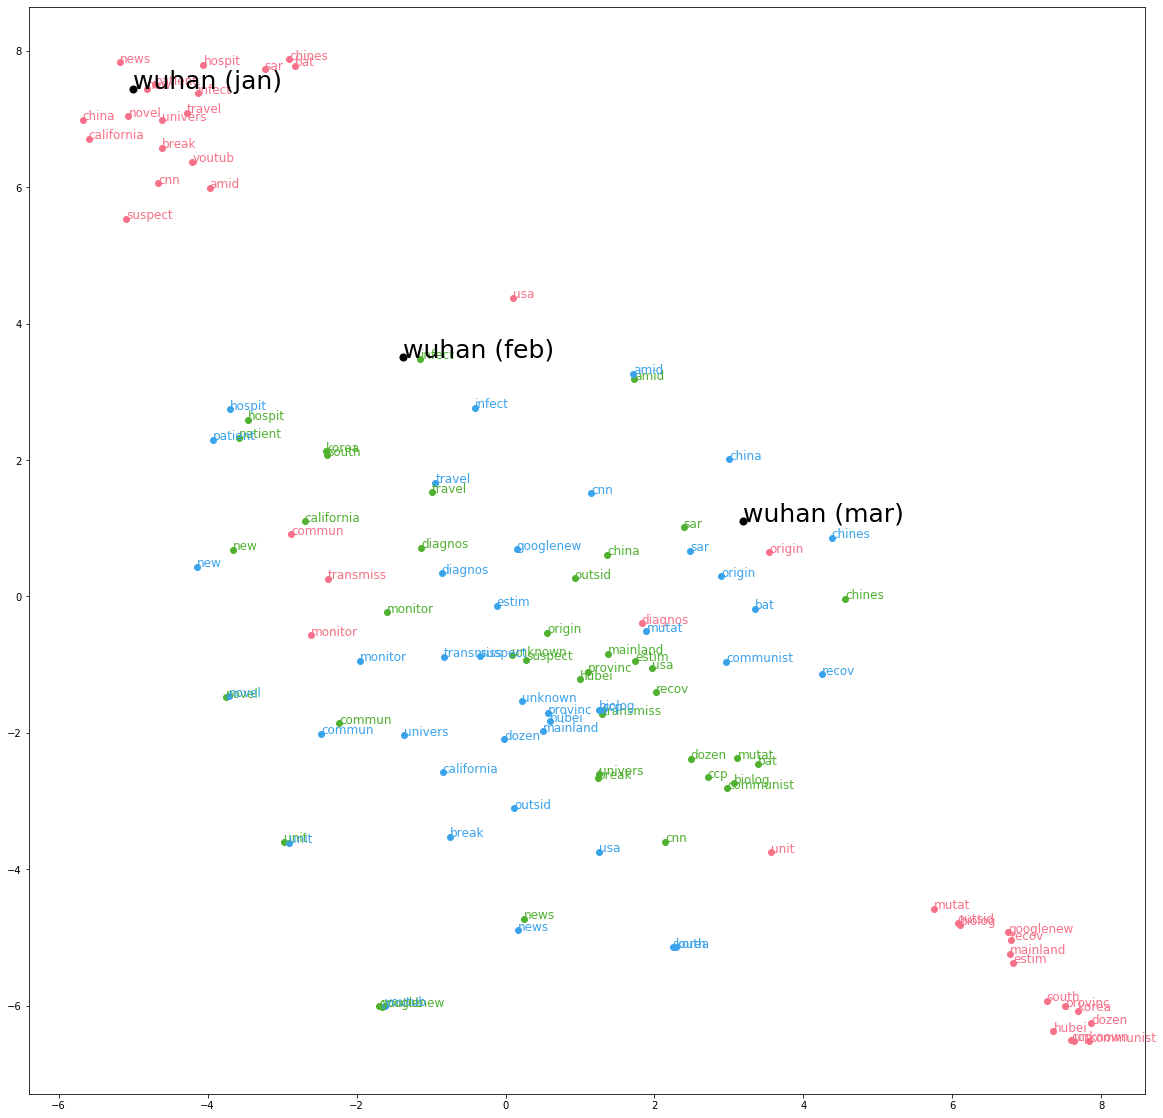

In [54]:
fig, ax = plt.subplots(1,1, figsize=(20,20))

for i, (x,y) in enumerate(X_tsne[:(v-1),:]):
    ax.scatter(x, y, c=cmap[0])
    ax.annotate(one_vocab[i], (x, y), c=cmap[0], fontsize=12)
    
for i, (x,y) in enumerate(X_tsne[v:(v*2)-1,:]):
    ax.scatter(x, y, c=cmap[1])
    ax.annotate(one_vocab[i], (x, y), c=cmap[1], fontsize=12)
    
for i, (x,y) in enumerate(X_tsne[(v*2):-1,:]):
    ax.scatter(x, y, c=cmap[2])
    ax.annotate(one_vocab[i], (x, y), c=cmap[2], fontsize=12)   
    
ax.scatter(X_tsne[v-1, 0], X_tsne[v-1, 1], c='black', s=50)
ax.annotate(one_vocab[v-1] + ' (jan)', (X_tsne[v-1, 0], X_tsne[v-1, 1]), c='black', fontsize=25)

ax.scatter(X_tsne[(v*2)-1, 0], X_tsne[(v*2)-1, 1], c='black', s=50)
ax.annotate(one_vocab[v-1] + ' (feb)', (X_tsne[(v*2)-1, 0], X_tsne[(v*2)-1, 1]), c='black', fontsize=25)

ax.scatter(X_tsne[-1, 0], X_tsne[-1, 1], c='black', s=50)
ax.annotate(one_vocab[v-1] + ' (mar)', (X_tsne[-1, 0], X_tsne[-1, 1]), c='black', fontsize=25)
    
fig.savefig("{}_coembed".format(w), dpi=300)